# CS445 Lab 2 by Alex Boyce

This dataset contains information about credit card holders in Taiwan.

It includes some basic demographic information, like sex, age, education level, marital status and also includes information regarding payment history, and default status.

Sourced from UCI Machine Learning Repository

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

#ignore future warnings lol
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#global dataset variable
df = pd.read_csv('default of credit card clients.csv', skiprows=1)#Print a portion of the raw data using head()
def print_data_head():
    #read the dataset
    print(df.head())
    print("\nColumn names:\n", df.columns.tolist(), "\n")

print_data_head()

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

### **Heatmap Correlation**

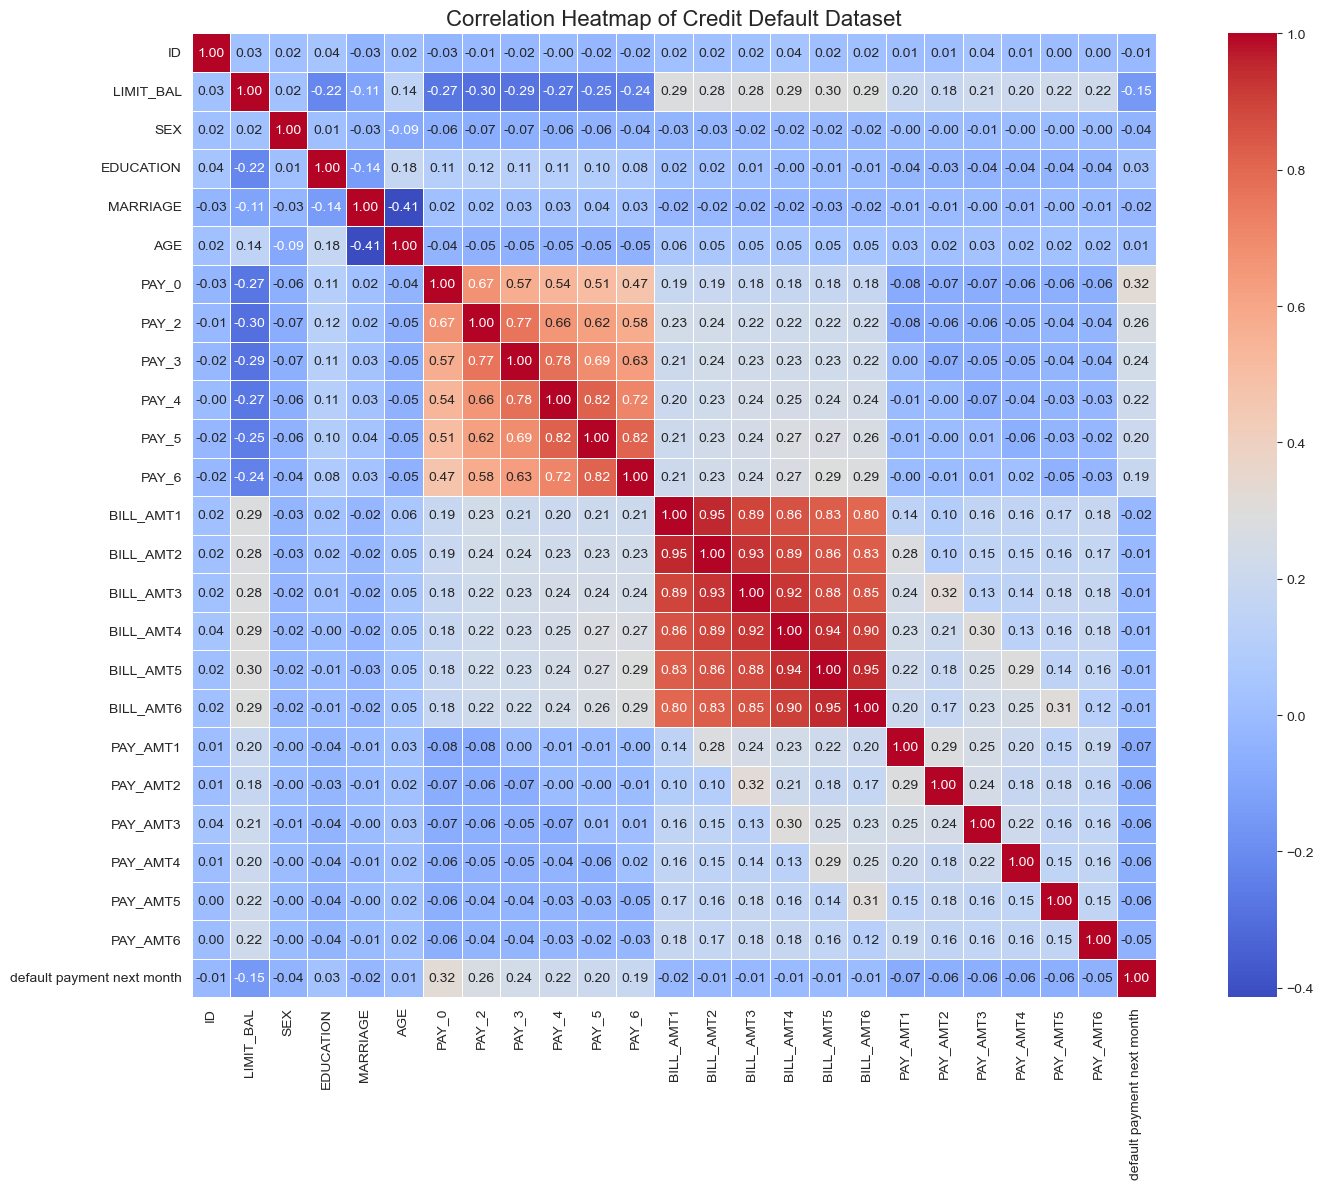

In [2]:
#heatmap correlation --- #1
def heatmap_correlations():
    plt.figure(figsize=(16, 12))

    #only use numeric columns
    numeric_df = df.select_dtypes(include='number')

    #compute correlation matrix
    correlation_matrix = numeric_df.corr()

    #draw heatmap
    sea.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

    #plot
    plt.title('Correlation Heatmap of Credit Default Dataset', fontsize=16)
    plt.tight_layout()
    plt.savefig('boyce-heatmap-correlations.png')
    plt.show()

heatmap_correlations() #1

The heatmap correlation visualization shows the correlation between the different features in the dataset.
The correlation values range from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation.
The correlation values are color coded, with red being a strong positive correlation and blue being a strong negative correlation.
With this information, we can see that the most correlated, and furthest from the center features are the LIMIT_BAL and Bill amounts. This might be expected, as the more money you have, the more you are likely to spend.

### **Credit by Age Bargraph**

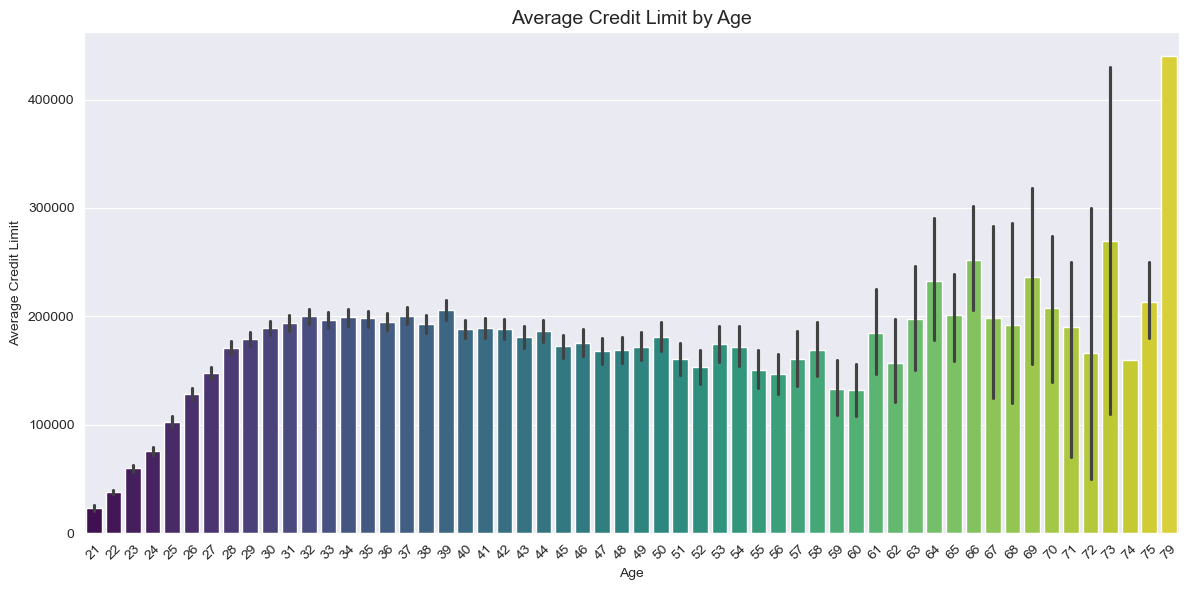

In [3]:
#barchart with avg bal limit-y and age-x --- #2
def bar_creditbyage():
    plt.figure(figsize=(12, 6))
    sea.barplot(x='AGE', y='LIMIT_BAL', data=df, palette= 'viridis')
    plt.title('Average Credit Limit by Age', fontsize=14)
    plt.xlabel('Age')
    plt.ylabel('Average Credit Limit')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('boyce-bar-creditbyage.png')
    plt.show()

bar_creditbyage() #2

The Credit by Age Bargraph visualization shows the average credit limits for a specific age population.
With this data visualized, we can see that the average credit limit increases with age, but there are some outliers, particularly after the age of 60.
This data visualization is interesting because there seems to be 3 distinct trends: Large growth until the age of 30, a slow decline from 30 to 60, and unpredictable credit limits passed the age of 60.
Based on this data, we can assume an average persons credit limit will slowly trend upwards through their life.


### **Credit limit and Education Boxplot**

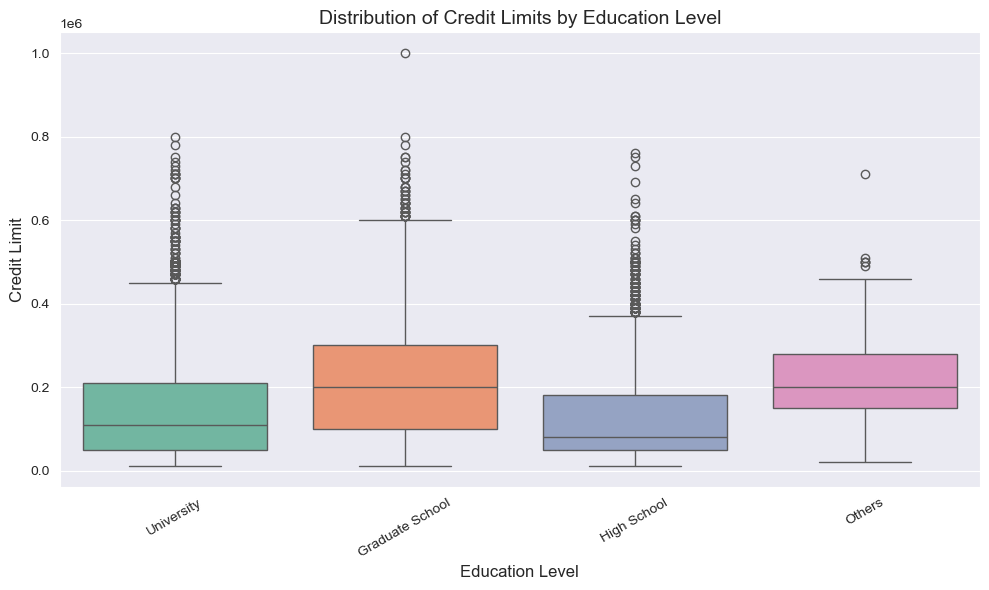

In [4]:
#boxplot with credit limit-y and education-x --- #3
def boxplot_limiteducation():
    plt.figure(figsize=(10, 6))

    #map education codes to readable labels
    edu_labels = {
        1: 'Graduate School',
        2: 'University',
        3: 'High School',
        4: 'Others'
    }

    #ignore education levels 0, 5, 6 because they are in the dataset but not documented by the source for whatever reason
    filtered_df = df[df['EDUCATION'].isin(edu_labels.keys())].copy()
    filtered_df['EDUCATION_LABEL'] = filtered_df['EDUCATION'].map(edu_labels)

    sea.boxplot(x='EDUCATION_LABEL', y='LIMIT_BAL', data=filtered_df, palette='Set2')

    #plot
    plt.title('Distribution of Credit Limits by Education Level', fontsize=14)
    plt.xlabel('Education Level', fontsize=12)
    plt.ylabel('Credit Limit', fontsize=12)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig('boyce-boxplot-limiteducation.png')
    plt.show()

boxplot_limiteducation() #3

The Credit Limit and Education Boxplot visualization shows the distribution of credit limits by education level. There are 4 education levels in the dataset, Graduate School, University, High School, and Others. We can see how those who attended graduate school have the highest average credit limit, and those who attended high school have the lowest average credit limit. This data would be useful to a bank or lender, as they could use this data to determine a credit limit range for someone of a specific education level.

### **Default Rate Barplot by Credit Limit**

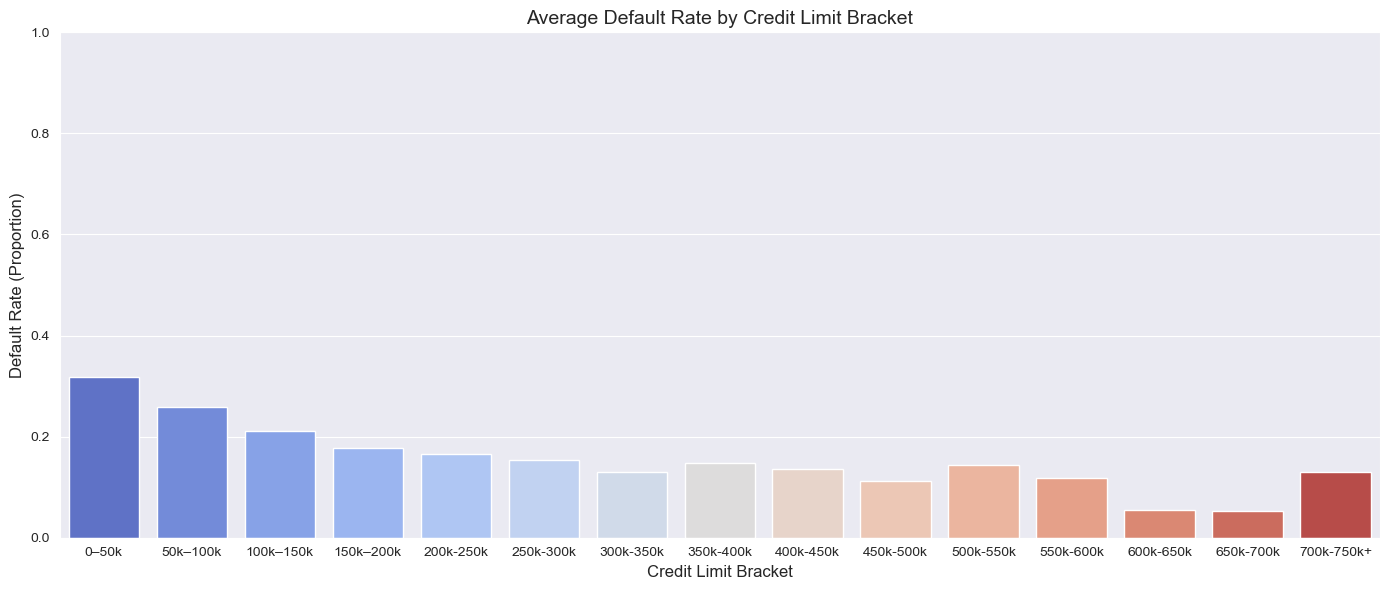

In [5]:
#barplot for credit limit-x and average default rate-y --- 4
def barplot_DefaultRate():
    #rounded bins
    bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, df['LIMIT_BAL'].max()]
    labels = ['0–50k', '50k–100k', '100k–150k', '150k–200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-550k', '550k-600k', '600k-650k', '650k-700k', '700k-750k+']

    #create the bin column
    df['LIMIT_BIN'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels, include_lowest=True)

    #find the mean default rate per bin
    grouped = df.groupby('LIMIT_BIN')['default payment next month'].mean().reset_index()

    plt.figure(figsize=(14, 6))
    sea.barplot(x='LIMIT_BIN', y='default payment next month', data=grouped, palette='coolwarm')

    #plot
    plt.title('Average Default Rate by Credit Limit Bracket', fontsize=14)
    plt.xlabel('Credit Limit Bracket', fontsize=12)
    plt.ylabel('Default Rate (Proportion)', fontsize=12)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig('boyce-bargraph-defaultrate.png')
    plt.show()

barplot_DefaultRate() #4

The Default Rate Barplot by Credit Limit visualization shows the average default rate by credit limit bracket. The data is binned into 15 brackets, and the average default rate is calculated for each bin. We can see that the default rate is highest in the 0-50k bracket, and slowly decreases as the credit limit increases. This data might also be useful to a bank or lender, as they could use this data to predict default risk based on credit limit.

### **Financial Metrics Pairplot**

In [ ]:
def pairplot_financial():
    #calulate totals
    df['TOTAL_BILLS'] = df[[f'BILL_AMT{i}' for i in range(1, 7)]].sum(axis=1)
    df['TOTAL_PAYMENTS'] = df[[f'PAY_AMT{i}' for i in range(1, 7)]].sum(axis=1)

    #pairplot features
    features = ['LIMIT_BAL', 'TOTAL_BILLS', 'TOTAL_PAYMENTS', 'AGE', 'default payment next month']
    pair_df = df[features].copy()

    #rename column from the dataset to something more readable
    pair_df.rename(columns={'default payment next month': 'Default'}, inplace=True)

    #plot
    sea.pairplot(pair_df, hue='Default', palette='coolwarm', diag_kind='kde', corner=True)
    plt.title('Pairplot of Financial Metrics', fontsize=16, y=3.5)
    plt.savefig('boyce-pairplot-financial.png')
    plt.show()

pairplot_financial() #5

The Financial Metrics Pairplot visualization shows the relationship between the different financial metrics in the dataset. The pairplot shows the scatterplot of each feature against each other, and the diagonal shows the distribution of each feature. The data is colored with red indicating default and blue indicating no default. Similar to the broadness of the Heatmap, this data is useful for understanding the relationships between the different financial metrics, and how much defaulting within a group occurs.